<a href="https://colab.research.google.com/github/Munfred/worm-tutorials/blob/main/tissue_enrichment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A brief tutorial for the WormBase Tissue Enrichment Analysis (TEA) Python interface

This notebook showcases how to usue the pip packaged version of Tissue Enrichment Analysis (TEA). \
TEA Results are output to a dataframe and example plots are shown. \\

Other Python tutorials for WormBase related utilities are available in the worm-tutorials page:  
https://github.com/Munfred/worm-tutorials


### Steps performed 

- Installing and loading the required libraries
- Loading a list of genes from a text file
- Fetching the needed analysis dictionaries from wormbase
- Performing enrichment analysis on the gene list
- Plotting the results withs tandard pandas function


### References

- **WormBase web tool for performing TEA**  
https://wormbase.org/tools/enrichment/tea/tea.cgi


- **TEA repository**  
https://github.com/dangeles/TissueEnrichmentAnalysis

- **TEA pip package**  
https://pypi.org/project/tissue_enrichment_analysis/

- **Original article describing the statistical model**   
Tissue enrichment analysis for C. elegans genomics  
Angeles-Albores, D., N. Lee, R.Y., Chan, J.,  Sternberg, P.W.   
BMC Bioinformatics 17, 366 (2016).  
https://doi.org/10.1186/s12859-016-1229-9



- **Micropublication describing the wormbase web tool**     
Angeles-Albores, D; Lee, RYN; Chan, J; Sternberg, PW   
Two new functions in the WormBase Enrichment Suite.   
Micropublication: biology. Dataset. (2018).  
https://doi.org/10.17912/W25Q2N

## Loading the required libraries

In [1]:
# pip install the enrichment analysis packages
# all other libraries we need are already available in the colab environment
!pip install tissue_enrichment_analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# this is the WormBase Enrichment Suite module (previously just TEA)
import tissue_enrichment_analysis as ea


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

## Loading your gene list and fetching the dictionaries
We download a list to showcase TEA.  \
There must be one gene per line and it must use the gene WBID. \
For example:
```
WBGene00000067
WBGene00000086
WBGene00000135
WBGene00000241
WBGene00000267
```

In [3]:
!wget https://github.com/dangeles/TissueEnrichmentAnalysis/raw/master/tutorial/EVN_wbids.csv

--2020-10-14 17:56:31--  https://github.com/dangeles/TissueEnrichmentAnalysis/raw/master/tutorial/EVN_wbids.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dangeles/TissueEnrichmentAnalysis/master/tutorial/EVN_wbids.csv [following]
--2020-10-14 17:56:31--  https://raw.githubusercontent.com/dangeles/TissueEnrichmentAnalysis/master/tutorial/EVN_wbids.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5209 (5.1K) [text/plain]
Saving to: ‘EVN_wbids.csv’

EVN_wbids.csv       100%[===================>]   5.09K  --.-KB/s    in 0s      

2020-10-14 17:56:31 (72.8 MB/s) - ‘EVN_wbids.csv’ saved [5209/5209

In [4]:
# take a look at the file we doanloaded
!head EVN_wbids.csv

gene_name
WBGene00000067
WBGene00000086
WBGene00000135
WBGene00000241
WBGene00000267
WBGene00000277
WBGene00000279
WBGene00000284
WBGene00000403


In [5]:
# load your DE genes (in WBID format) to a pandas dataframe or to a list
df = pd.read_csv('EVN_wbids.csv')

In [6]:
# fetch the dictionaries using the fetch_dictionary function
# these dictionaries are provided and kept up to date by WormBase 
# they and are used to compute the anaysis
tissue = ea.fetch_dictionary('tissue')
phenotype = ea.fetch_dictionary('phenotype')
go = ea.fetch_dictionary('go')

## Analyzing your gene list

### NOTE: After 10^-64, the hypergeometric function crashes and returns 0
Thus sometimes extremely significant results will return nan or infs, as happens here with some of the tissue results


In [7]:
# place the dictionaries into a python dict
frames = {'tissue': tissue, 'phenotype': phenotype, 'go': go}

# test the list of genes against each dictionary and store the
# results in a hash called results
# NOTE: The enrichment_analysis function only returns statistically significant results!
result = {}
for analysis, dictionary in frames.items():
    result[analysis] = ea.enrichment_analysis(df.gene_name, dictionary, show=False, alpha=10**-1)

In [8]:
## take a look at the returned data frames
for analysis in result:
  print('\n \n This is the ', analysis, ' result dataframe, it has', str(len(result[analysis])), ' entries')
  display(result[analysis].head())


 
 This is the  tissue  result dataframe, it has 19  entries


,Term,Expected,Observed,Enrichment Fold Change,P value,Q value
66,hook sensillum WBbt:0006930,12.744930,324,25.421873,0.000000e+00,0.000000e+00
44,CEM WBbt:0005246,12.598437,324,25.717477,0.000000e+00,0.000000e+00
119,ray WBbt:0006941,15.857916,324,20.431436,0.000000e+00,0.000000e+00
85,inner labial sensillum WBbt:0005116,17.066487,324,18.984575,0.000000e+00,0.000000e+00
51,male WBbt:0007850,96.246196,324,3.366367,6.814926e-82,3.952657e-80



 
 This is the  phenotype  result dataframe, it has 44  entries


,Term,Expected,Observed,Enrichment Fold Change,P value,Q value
148,ciliated neuron morphology variant WBPhenotype...,0.852619,15,17.592850,1.808972e-16,4.287265e-14
167,chemosensory behavior variant WBPhenotype:0001049,3.593181,21,5.844404,2.102405e-11,2.491350e-09
171,copulation variant WBPhenotype:0000647,3.532279,19,5.378963,6.759913e-10,4.326154e-08
101,acetylcholinesterase inhibitor response varian...,5.070039,23,4.536455,5.476144e-10,4.326154e-08
18,sexually dimorphic behavior variant WBPhenotyp...,3.547505,19,5.355878,7.289501e-10,4.326154e-08



 
 This is the  go  result dataframe, it has 19  entries


,Term,Expected,Observed,Enrichment Fold Change,P value,Q value
92,cell projection GO:0042995,11.632964,57,4.899869,1.921717e-23,2.286844e-21
49,neuropeptide signaling pathway GO:0007218,2.432680,22,9.043525,4.607597e-16,2.741520e-14
103,cell body GO:0044297,4.115435,23,5.588716,6.039703e-12,2.395749e-10
36,cell projection organization GO:0030030,6.017681,27,4.486778,2.564230e-11,7.628583e-10
39,dendritic tree GO:0097447,2.469261,13,5.264733,2.122399e-07,5.051309e-06


## Plotting the results
 We make a barplot showing -log10(Qvalue) the pandas default plotting functions, which uses matplotlib. 
 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


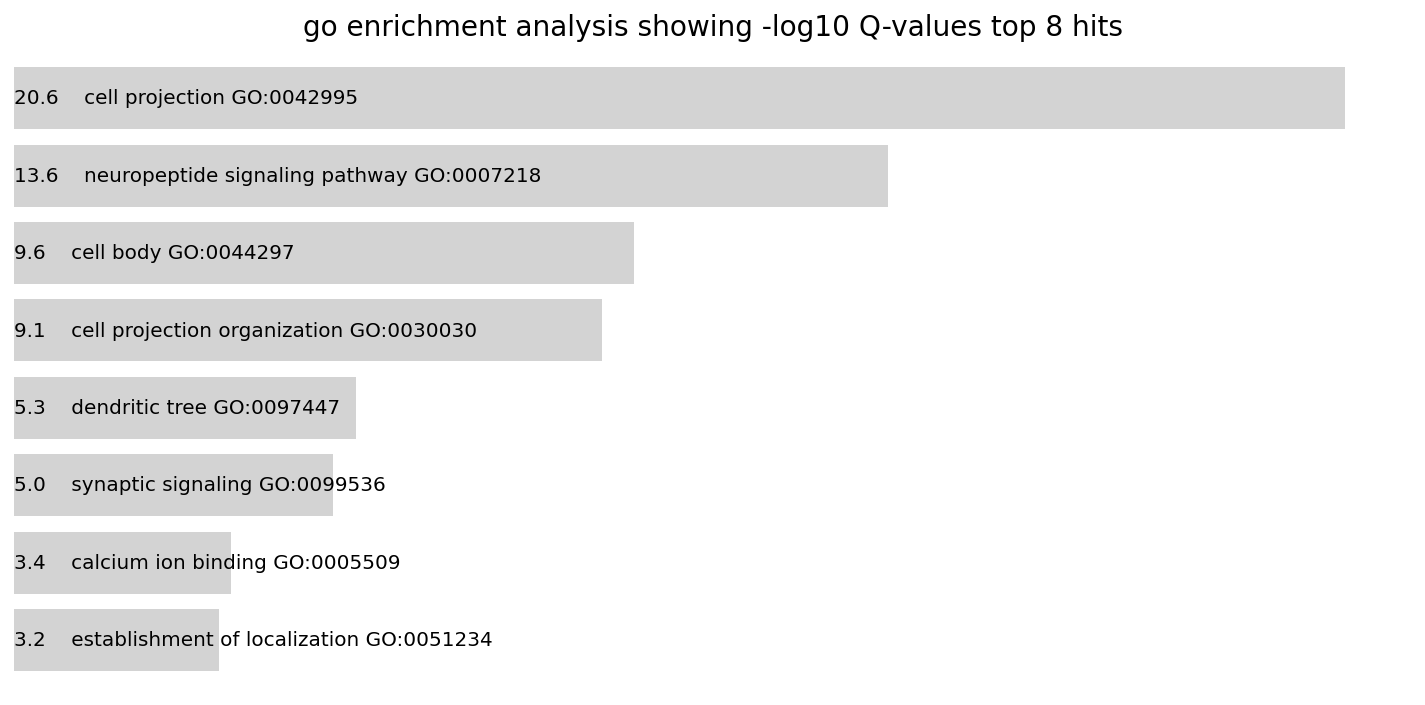

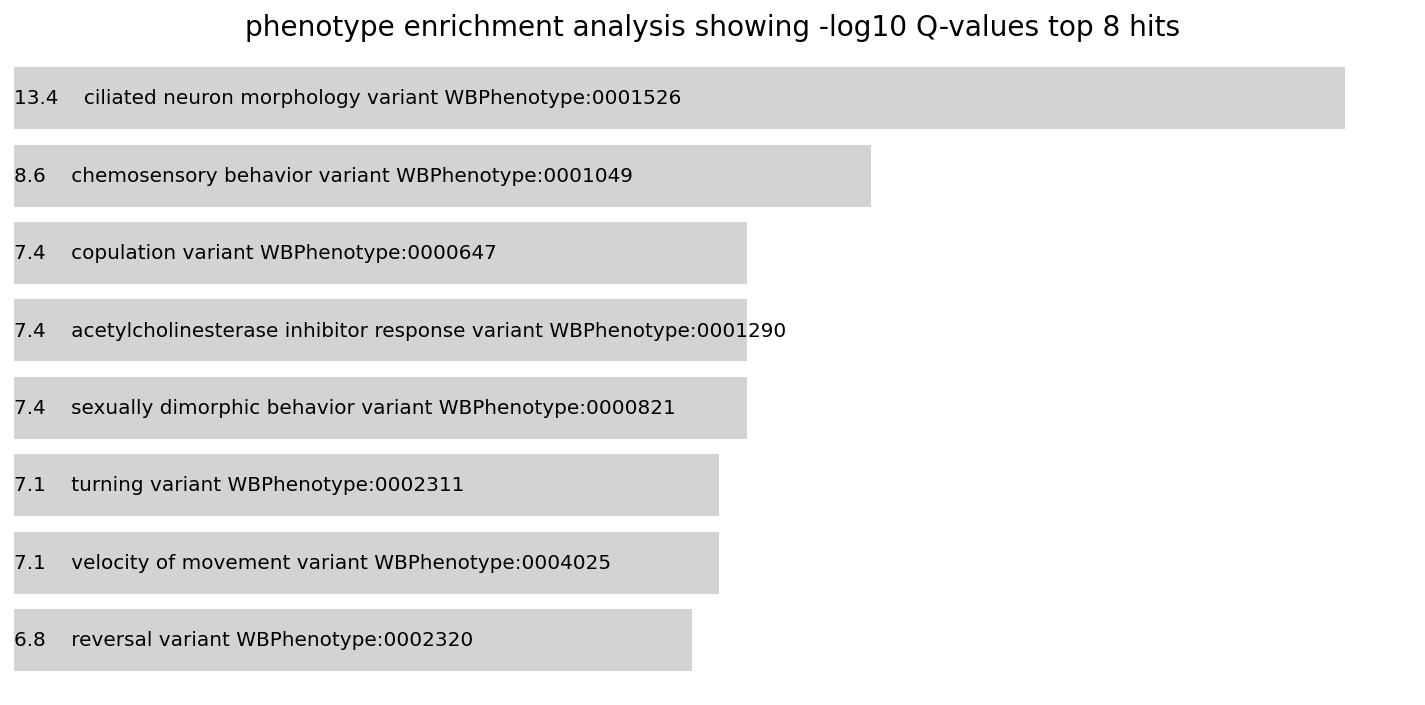

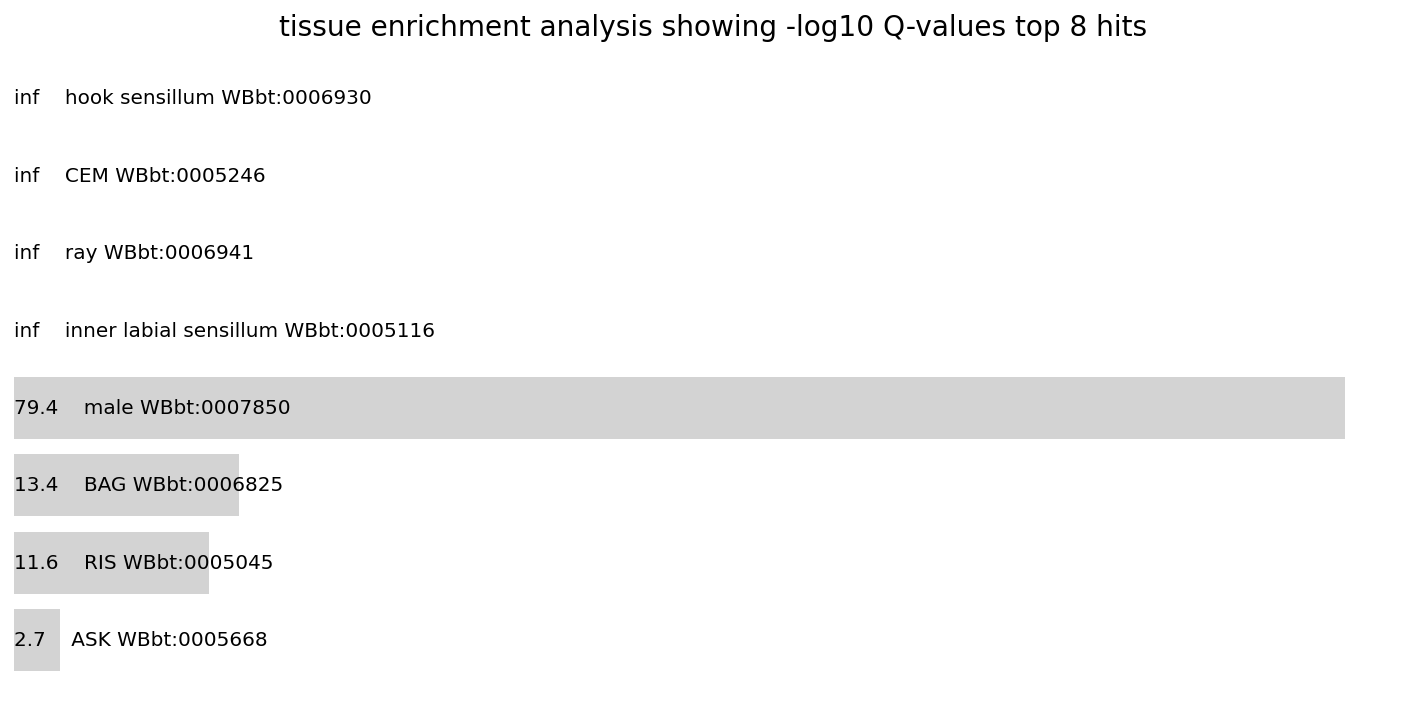

In [9]:
for analysis in ['go', 'phenotype', 'tissue']:
    df=result[analysis]
    df['minus_log10_Qvalue'] = -np.log10(df['Q value'])

    # get the top 8 results and flip the dataframe so most signficant results are first
    df=df.head(8).iloc[::-1]
    df.plot(x='Term',y='minus_log10_Qvalue',kind="barh", legend=False, width=0.8 , color = 'lightgray', figsize = (10,5))
    for i, (Term, qval) in enumerate(zip(df['Term'], df["minus_log10_Qvalue"].round(1).astype(str))):
        plt.text(s=qval + '    ' + Term, x=0, y=i, color="k", horizontalalignment='left', verticalalignment="center", size=10)
        plt.axis("off")
        plt.tight_layout()
        plt.title(f'{analysis} enrichment analysis showing -log10 Q-values top 8 hits', fontsize=14)
plt.show()